In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import make_blobs, make_moons, make_circles
import sklearn.datasets
import dbcv


In [15]:
##Sanity Check 
## Creaiamo un dataset con gruppi di punti ben distinti (Caso favorevole)  

Text(0.5, 1.0, "Il valore della metrica DBCV e': 0.8602")

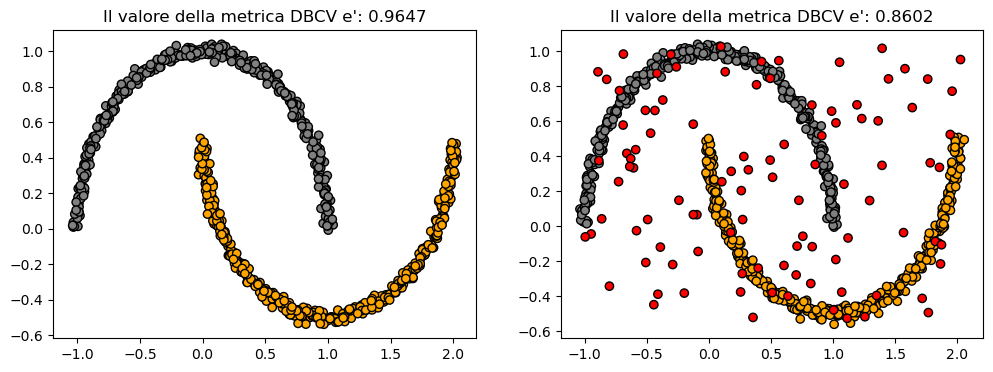

In [191]:
##Clusters mezzelune
#-- CREAZIONE CLUSTERS MEZZALUNA SENZA PUNTI NOISE
X1, y1 = sklearn.datasets.make_moons(n_samples = 800, noise = 0.02, random_state = 42)
#-- CREAZIONE CLUSTERS MEZZALUNA CON PUNTI NOISE
X2, y2 = sklearn.datasets.make_moons(n_samples = 800, noise = 0.02, random_state = 40)
noise_id = -1
rng = np.random.RandomState(1082)
X2_noise = rng.uniform(*np.quantile(X2, (0, 1), axis = 0), size = (100, 2))
y2_noise = 100 *  [noise_id]
X2, y2 = np.vstack((X2, X2_noise)), np.hstack((y2, y2_noise))
#-- CALCOLO VALORE DBCV PER OGNI PLOT DI CLUSTERS
score_senza_noise = dbcv.dbcv(X1, y1)
score_con_noise = dbcv.dbcv(X2, y2)
#--
#-- IMPOSTAZIONE DEI COLORI DEI CLUSTERS E CREAZIONE DEI SUBPLOTS
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
cluster_colors = {-1: "red", 0: "gray", 1: "orange"}
#-- CREAZIONE DI OGNI PLOT DI CLUSTERS 
axes[0].scatter(X1[:, 0], X1[:, 1], c = [cluster_colors[label] for label in y1], edgecolors = "k")
axes[1].scatter(X2[:, 0], X2[:, 1], c = [cluster_colors[label] for label in y2], edgecolors = "k")
#-- PRINT I VALORI DBCV PER OGNI PLOT DI CLUSTERS 
axes[0].set_title(f"Il valore della metrica DBCV e': {score_senza_noise:.4f}")
axes[1].set_title(f"Il valore della metrica DBCV e': {score_con_noise:.4f}")
#---


Text(0.5, 1.0, "Il valore di DBCV e': 0.4615")

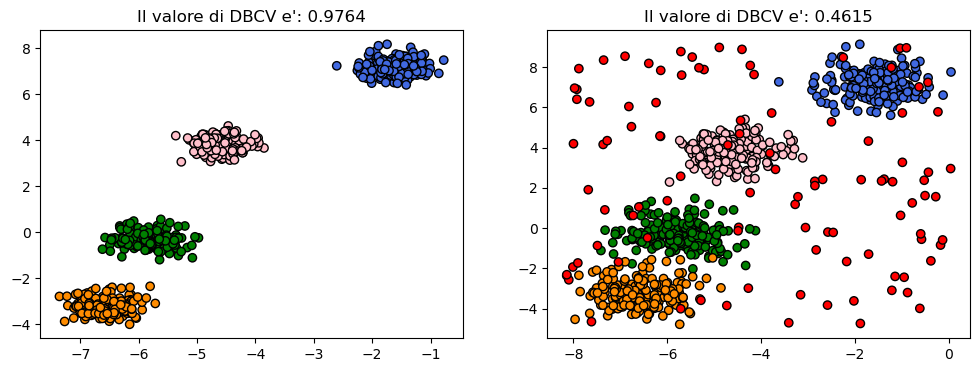

In [305]:
#Clusters circolari ben separati
#-- CREAZIONE CLUSTERS CIRCOLARI SENZA PUNTI NOISE
X1, y1 = sklearn.datasets.make_blobs(n_samples = 800, centers = 4, cluster_std = 0.30, random_state = 22)
#-- CREAZIONE CLUSTERS CIRCOLARI CON PUNTI NOISE
X2, y2 = sklearn.datasets.make_blobs(n_samples = 800, centers = 4, cluster_std = 0.60, random_state = 22)
noise_id = -1
rng = np.random.RandomState(200)
quantiles = np.quantile(X2, (0, 1), axis = 0)
X2_noise = rng.uniform(*quantiles, size = (100, 2))
y2_noise = 100 * [noise_id]
X2, y2 = np.vstack((X2, X2_noise)), np.hstack((y2, y2_noise))
#-- CALCOLO VALORE DBCV PER OGNI PLOT DI CLUSTERS
score_dbcv_blobs_without_noise = dbcv.dbcv(X1, y1)
score_dbcv_blobs_with_noise = dbcv.dbcv(X2, y2)
#-- IMPOSTAZIONE COLORI CLUSTERS E CREAZIONE DEI SUBPLOTS
cluster_colors = {-1: "red", 0: "green", 1: "royalblue", 2: "darkorange", 3: "pink"}
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#-- CREAZIONE DI OGNI PLOT DI CLUSTERS 
axes[0].scatter(X1[:, 0], X1[:, 1], c = [cluster_colors[label] for label in y1], edgecolors = 'k')
axes[1].scatter(X2[:, 0], X2[:, 1], c = [cluster_colors[label] for label in y2], edgecolors = 'k')
#-- PRINT I VALORI DBCV PER OGNI PLOT DI CLUSTERS 
axes[0].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_without_noise:.4f}")
axes[1].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_with_noise:.4f}")

Text(0.5, 1.0, "Il valore di DBCV e': 0.4171")

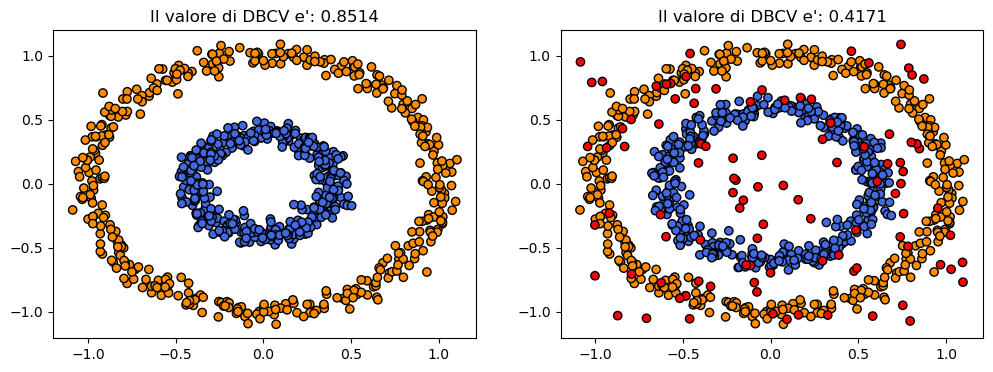

In [303]:
#ANELLI CONCENTRICI
#-- CREAZIONE CLUSTERS CON FORMA DI ANNELLI SENZA PUNTI NOISE
X1, y1 = sklearn.datasets.make_circles(n_samples = 800, noise = 0.05, factor = 0.4, random_state = 47)
#-- CREAZIONE CLUSTERS CON FORMA DI ANNELLI CON PUNTI NOISE
X2, y2 = sklearn.datasets.make_circles(n_samples = 800, noise = 0.05, factor = 0.6, random_state = 47)
noise_id = -1
rng = np.random.RandomState(330)
quantiles = np.quantile(X2, (0, 1), axis = 0)
X2_noise = rng.uniform(*quantiles, size = (100, 2))
y2_noise = 100 * [noise_id]
X2, y2 = np.vstack((X2, X2_noise)), np.hstack((y2, y2_noise))
#-- CALCOLO VALORE DBCV PER OGNI PLOT DI CLUSTERS
score_dbcv_circles_without_noise = dbcv.dbcv(X1, y1)
score_dbcv_circles_with_noise = dbcv.dbcv(X2, y2)
#-- IMPOSTAZIONE COLORI CLUSTERS E CREAZIONE DEI SUBPLOTS
cluster_colors = {-1: "red", 0: "darkorange", 1: "royalblue"}
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#-- CREAZIONE DI OGNI PLOT DI CLUSTERS 
axes[0].scatter(X1[:, 0], X1[:, 1], c = [cluster_colors[label] for label in y1], edgecolors = 'k')
axes[1].scatter(X2[:, 0], X2[:, 1], c = [cluster_colors[label] for label in y2], edgecolors = 'k')
#-- PRINT I VALORI DBCV PER OGNI PLOT DI CLUSTERS 
axes[0].set_title(f"Il valore di DBCV e': {score_dbcv_circles_without_noise:.4f}")
axes[1].set_title(f"Il valore di DBCV e': {score_dbcv_circles_with_noise:.4f}")

Text(0.5, 1.0, "Il valore di DBCV e': -0.1862")

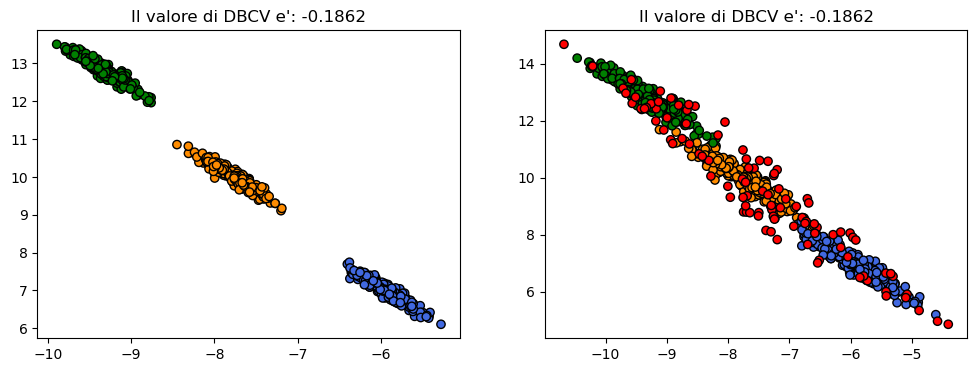

In [317]:
## CLUSTERS ANISOTROPICI
num_punti = 800
centroidi = 3
X1, y1 = sklearn.datasets.make_blobs(n_samples = num_punti, centers = centroidi, cluster_std = 0.30, random_state = 34)
#--
X2, y2 = sklearn.datasets.make_blobs(n_samples = num_punti, centers = centroidi, cluster_std = 0.60, random_state = 34)
noise_id = -1
rng = np.random.RandomState(800)
quantiles = np.quantile(X2, (0, 1), axis = 0)
X2_noise = rng.uniform(*quantiles, size = (100, 2))
y2_noise = 100 * [noise_id]
X2, y2 = np.vstack((X2, X2_noise)), np.hstack((y2, y2_noise))
#--
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X1_aniso = np.dot(X1, transformation)
X2_aniso = np.dot(X2, transformation)
#--
score_dbcv_blobs_senza_noise = dbcv.dbcv(X1_aniso, y1)
score_dbcv_blobs_senza_noise = dbcv.dbcv(X2_aniso, y2)

#--
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
cluster_colors = {-1: "red", 0: "darkorange", 1: "royalblue", 2: "green"}
axes[0].scatter(X1_aniso[:, 0], X1_aniso[:, 1], c = [cluster_colors[label] for label in y1], edgecolors = "k")
axes[1].scatter(X2_aniso[:, 0], X2_aniso[:, 1], c = [cluster_colors[label] for label in y2], edgecolors = "k")
#--
axes[0].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_senza_noise:.4f}")
axes[1].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_senza_noise:.4f}")

Text(0.5, 1.0, "Il valore di DBCV e': 0.2509")

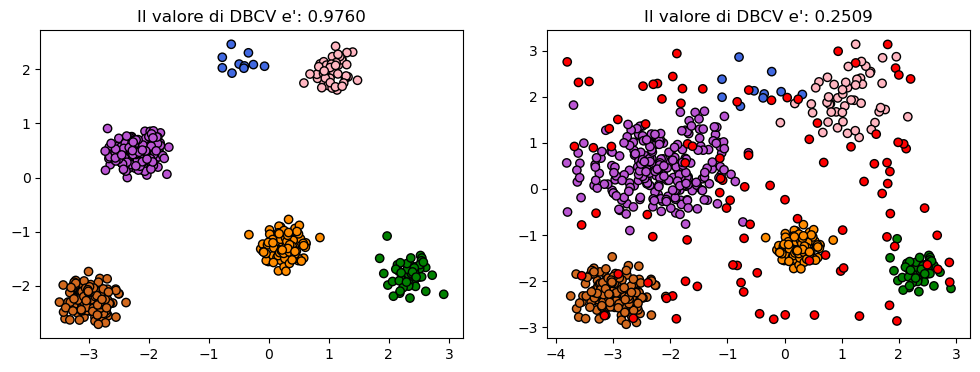

In [293]:
## CLUSTERS BLOBS CON DENSITA' UGUALE 
#--
num_clusters = 6
num_punti_clusters = [100, 10, 150, 50, 250, 50]
deviazione_clusters = [0.2, 0.4, 0.3, 0.5, 0.6, 0.2]
centers = np.random.RandomState(100).uniform(-3, 3, size=(num_clusters, 2))
#--
X1, y1 = sklearn.datasets.make_blobs(n_samples = num_punti_clusters, centers = centers, cluster_std = 0.2, random_state = 66) 
#--
X2, y2 = sklearn.datasets.make_blobs(n_samples = num_punti_clusters, centers = centers, cluster_std = deviazione_clusters, random_state = 66)
noise_id = -1
rng = np.random.RandomState(330)
quantiles = np.quantile(X2, (0, 1), axis = 0)
X2_noise = rng.uniform(*quantiles, size = (100, 2))
y2_noise = 100 * [noise_id]
X2, y2 = np.vstack((X2, X2_noise)), np.hstack((y2, y2_noise))
#-- CALCOLO VALORE DBCV PER OGNI PLOT DI CLUSTERS
score_dbcv_blobs_without_noise = dbcv.dbcv(X1, y1)
score_dbcv_blobs_with_noise = dbcv.dbcv(X2, y2)
#--
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
cluster_colors = {-1: "red", 0: "darkorange", 1: "royalblue", 2: "chocolate", 3: "lightpink", 4: "mediumorchid", 5: "green"}
#--
axes[0].scatter(X1[:, 0], X1[:, 1], c = [cluster_colors[label] for label in y1], edgecolor = "k")
axes[1].scatter(X2[:, 0], X2[:, 1], c = [cluster_colors[label] for label in y2], edgecolor = "k")
#--
axes[0].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_without_noise:.4f}")
axes[1].set_title(f"Il valore di DBCV e': {score_dbcv_blobs_with_noise:.4f}")